In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
dfm  =  pd.read_csv ('datasets/IPL_Matches.csv')
dfd  =  pd.read_csv ('datasets/IPL_Deliveries.csv')

In [3]:
dfm.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
583,584,2016,Hyderabad,2016-04-16,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,normal,0,Kolkata Knight Riders,0,8,G Gambhir,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN


In [4]:
dfd.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
44603,190,1,Kings XI Punjab,Chennai Super Kings,6,5,KC Sangakkara,IK Pathan,L Balaji,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
44039,187,2,Kolkata Knight Riders,Rajasthan Royals,13,1,BJ Hodge,SC Ganguly,YK Pathan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Q 1

In [5]:
dfm.shape[0]

636

# Q 2

In [6]:
dfm['season'].nunique()

10

# Q 3

In [7]:
dfm['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

# Q 4

In [8]:
dfm['venue'].value_counts()  .head()

M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64

# Q 5

In [9]:
dfm ['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [10]:
dfm.replace ([   'Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers',
                 'Chennai Super Kings', 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                
                , ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'] , inplace=True)


dfd.replace ([    'Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers',
                  'Chennai Super Kings','Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                 
                 , ['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'] , inplace=True)

# Q 6

In [11]:
dfm ['winner'] .value_counts()  .head(1)

MI    92
Name: winner, dtype: int64

# Q 7

In [12]:
dfm ['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

# Q 8

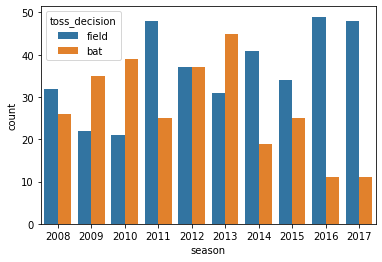

In [13]:
sns.countplot ( dfm ['season']  ,  hue = dfm ['toss_decision'] ) ;

# Q 9

In [14]:
dfm [ dfm ['toss_winner'] == dfm ['winner'] ]   .shape[0]  

325

In [15]:
dfm.shape[0]

636

In [16]:
325 / 636

0.5110062893081762

# Q 10

In [17]:
dfm [ dfm ['toss_winner'] == dfm ['winner'] ]    ['winner'].value_counts()

MI      48
KKR     44
CSK     42
RCB     35
RR      34
DD      33
KXIP    28
DC      19
SRH     17
GL      10
RPS      8
KTK      4
PW       3
Name: winner, dtype: int64

# Q 11

In [18]:
dfd.groupby('batsman') ['batsman_runs'].sum()   .reset_index().sort_values (by = 'batsman_runs', ascending = 0) .head(1)

,batsman,batsman_runs
374,SK Raina,4548


# Q 12

In [19]:
dfd.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum())   .reset_index().sort_values(by='batsman_runs', ascending=False).head(1)

,batsman,batsman_runs
85,CH Gayle,266


In [20]:
dfd.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum())   .reset_index().sort_values(by='batsman_runs', ascending=False).head(1)

,batsman,batsman_runs
137,G Gambhir,484


# Q 13

In [21]:
dfd.groupby('bowler')['ball'].count()   .reset_index().sort_values(by = 'ball', ascending = 0).head(1)

,bowler,ball
117,Harbhajan Singh,2989


# Q 14

In [22]:
dfd ['dismissal_kind'].value_counts()       .head(1)

caught    4373
Name: dismissal_kind, dtype: int64

# Q 15

In [23]:
dfd.groupby('bowler')['batsman_runs'].sum()   .reset_index().sort_values(by = 'batsman_runs', ascending = 0).head(1)

,bowler,batsman_runs
117,Harbhajan Singh,3295


# Q 16

In [24]:
q16df = dfm [['id','season']].merge ( dfd[['match_id','total_runs']] , left_on = 'id', right_on = 'match_id', how = 'left')

In [25]:
q16df [['season','total_runs']].head(5)

,season,total_runs
0,2017,0
1,2017,0
2,2017,4
3,2017,0
4,2017,2


In [26]:
q16df.groupby('season')['total_runs'].sum()

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    18931
2015    18353
2016    18862
2017    18786
Name: total_runs, dtype: int64

# Q 17

In [27]:
dfm.groupby('winner')['win_by_runs'].sum()   .reset_index().sort_values(by = 'win_by_runs', ascending=0)   .head(1)

,winner,win_by_runs
0,CSK,1587


# Q 18

In [28]:
dfm.groupby('winner')['win_by_wickets'].sum()   .reset_index().sort_values(by = 'win_by_wickets', ascending=0)   .head(1)

,winner,win_by_wickets
4,KKR,291


# Q 19

In [29]:
a  =  dfm.groupby (['winner','venue'])  ['id'].count()

a['CSK'].sort_values (ascending = False)  .head(1)

venue
MA Chidambaram Stadium, Chepauk    33
Name: id, dtype: int64

# Q 20

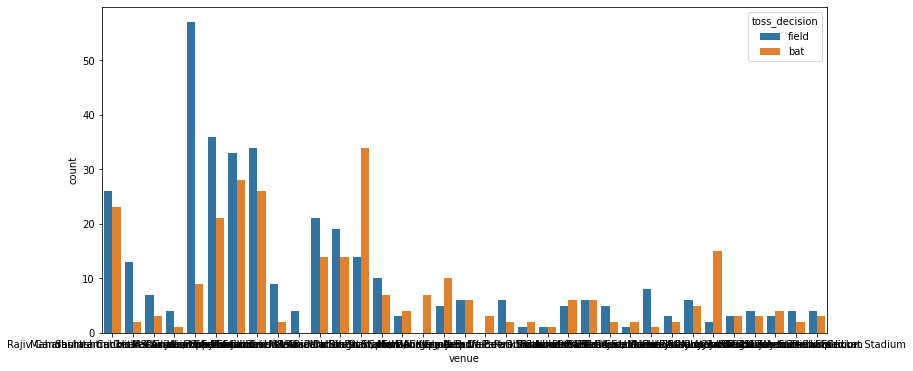

In [30]:
plt.figure (figsize =(13,6))
sns.countplot ( dfm['venue'] , hue = dfm['toss_decision'] ) ;

In [31]:
# yes it varies in some venues

# Q 21

In [32]:
dfm [ (dfm['toss_winner'] == 'CSK') & (dfm['winner'] == 'CSK') ]     ['toss_decision'].value_counts()

bat      29
field    13
Name: toss_decision, dtype: int64